# Tumores e Florestas Aleatórias


Imagine que você tem uma grande decisão a tomar, mas não tem certeza de qual é a melhor opção. Em vez de confiar apenas na sua própria opinião, você pede conselhos a várias pessoas especializadas em diferentes áreas. Cada uma delas fornece uma opinião, e você considera todas essas opiniões para tomar sua decisão. Da mesma forma, uma Random Forest (Floresta Aleatória) é uma técnica em que várias "vozes" (modelos) especializadas, chamadas árvores de decisão, trabalham juntas para tomar uma decisão final. Cada árvore contribui com sua própria sugestão e, no final, a Floresta Aleatória combina todas essas sugestões para dar uma resposta mais confiável. Essa abordagem é útil quando queremos tomar decisões baseadas em muitas informações diferentes, tornando o resultado mais preciso e confiável, assim como quando você consulta várias opiniões antes de fazer uma escolha importante.

Fonte: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [19]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, roc_auc_score


In [3]:
cancer = load_breast_cancer(as_frame=True)
X = cancer.data
y = cancer.target

In [4]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [23]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = clf.predict(X_test)


In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.9736842105263158


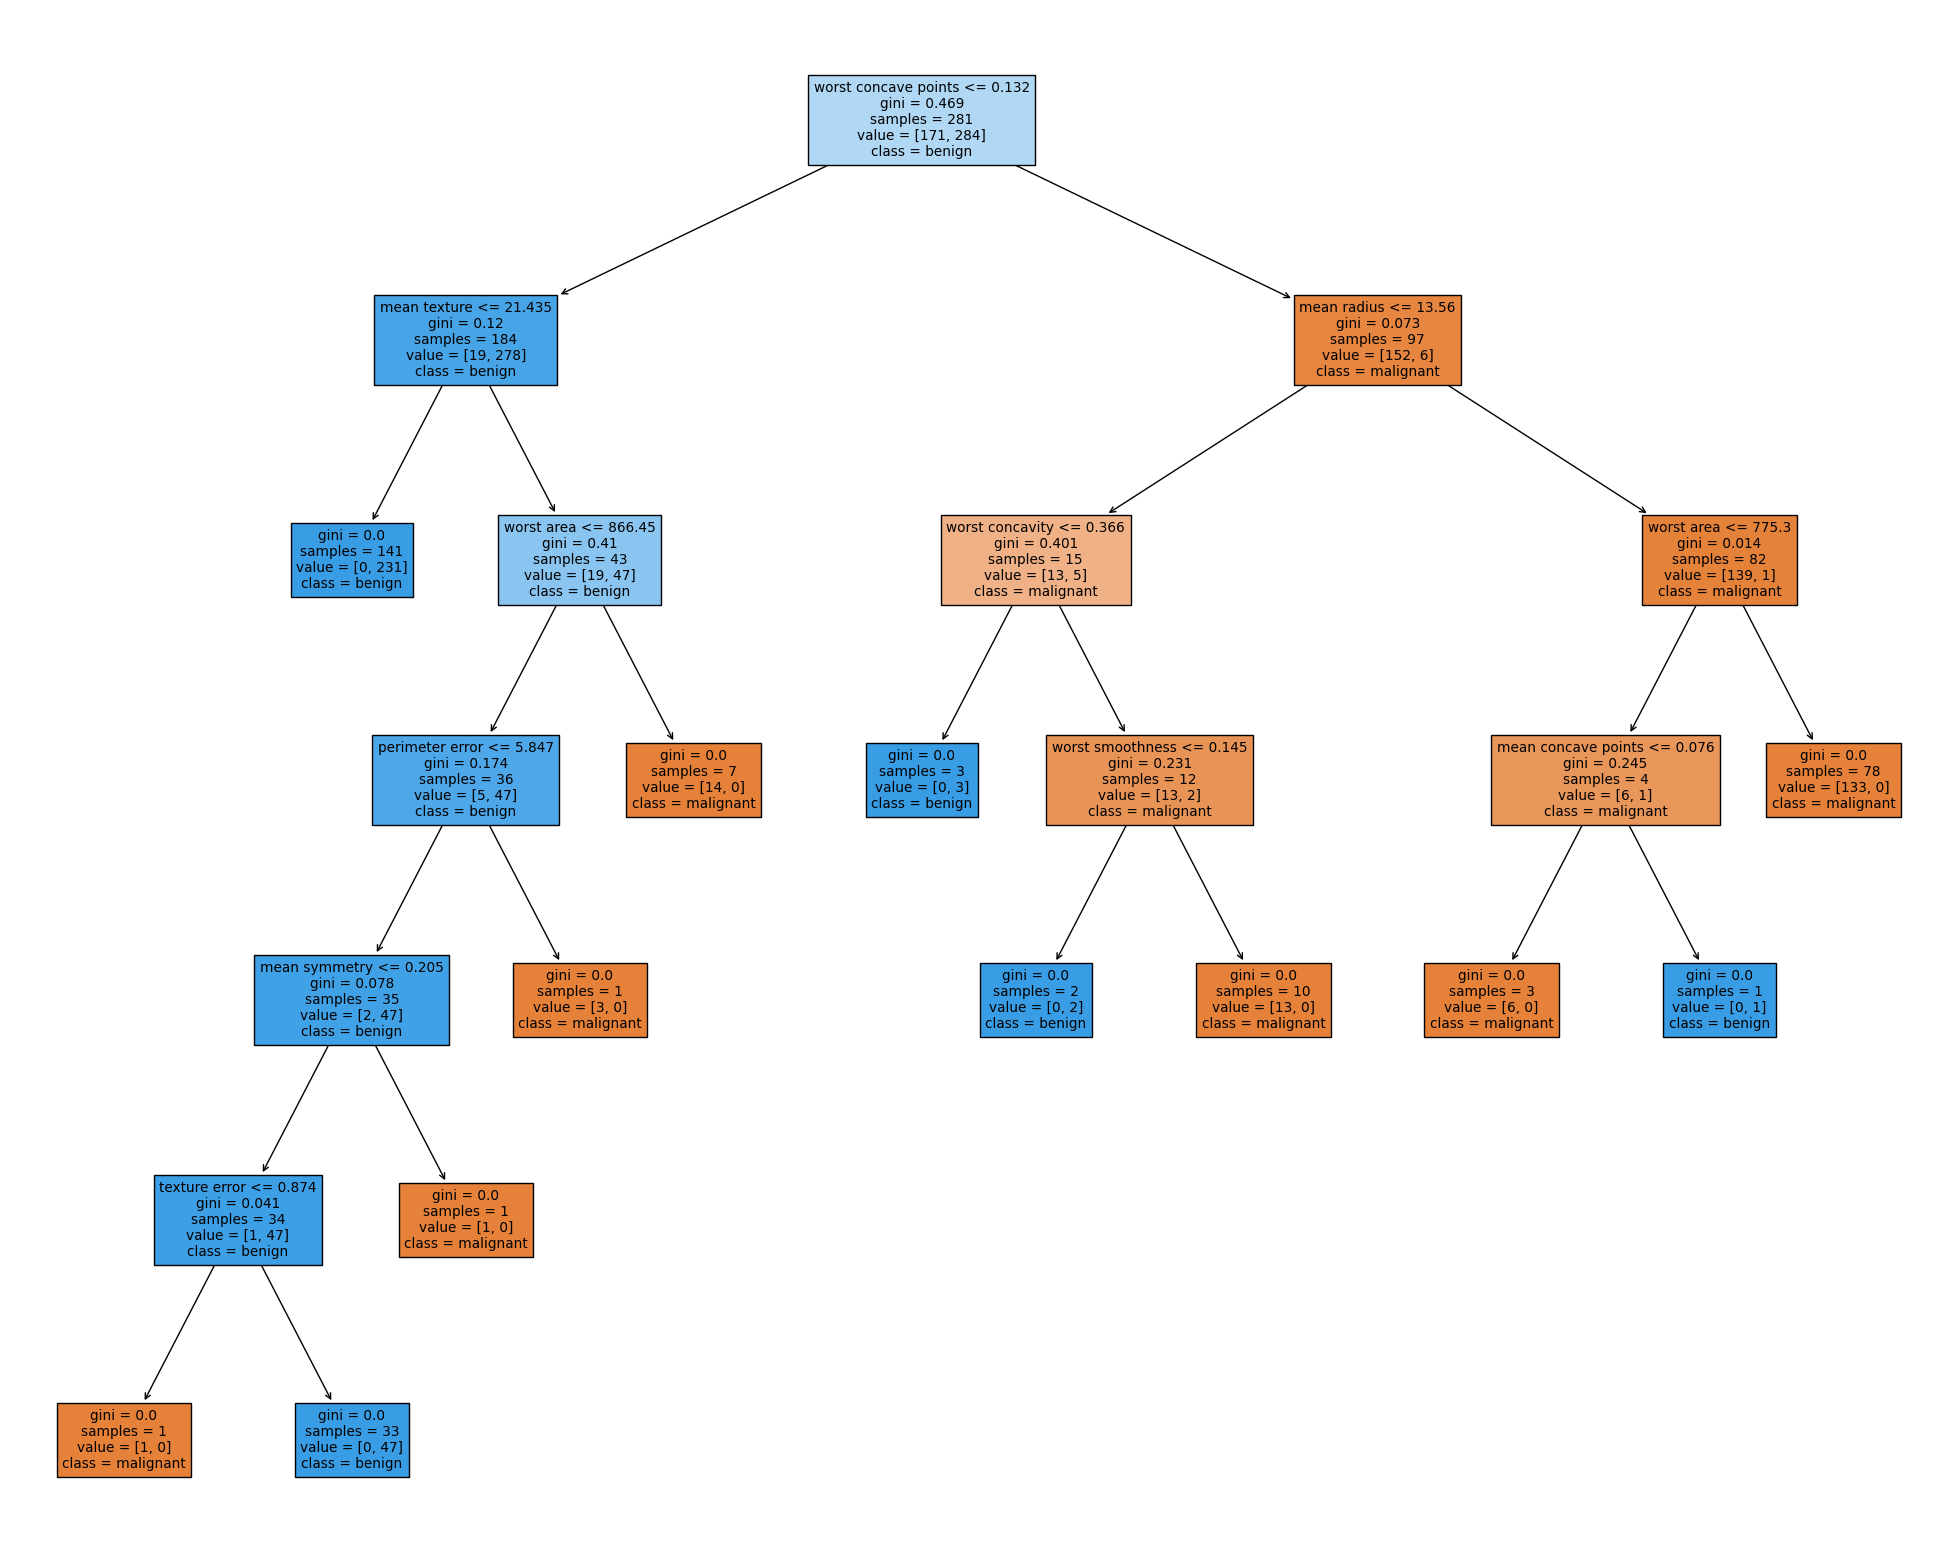

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25, 20))
ax = fig.add_subplot(111)  # Crie um objeto Axes
plot_tree(clf.estimators_[0], feature_names=list(cancer.feature_names), class_names=list(cancer.target_names), filled=True, ax=ax)
plt.show()